In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

model_base=Sequential()
model_base.add(Dense(64, activation='relu',input_shape=(784,)))
model_base.add(Dense(64, activation='relu'))
model_base.add(Dense(10, activation='softmax'))
model_base.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [2]:
# Utilizando la API funcional de Keras que permite construir todo
# tipo de grafos con las capas
from tensorflow import keras

inputs = keras.Input(shape=(784,))
inputs.shape
inputs.dtype

tf.float32

In [4]:
from tensorflow.keras import layers
dense1 = layers.Dense(64, activation='relu')(inputs)

In [5]:
dense2 = layers.Dense(64,activation='relu')(dense1)
outputs = layers.Dense(10,activation='softmax')(dense2)
model=keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


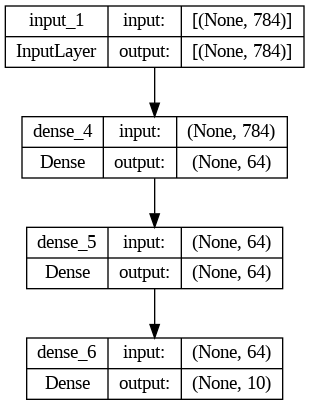

In [6]:
# Forma alternativa al método de summary() que ofrece Keras
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [7]:
# De ahí se entrena y se utiliza de la misma manera que con los mdoelos secuenciales
# vistos anteriormente
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2761 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1245 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0911 - accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9749


[0.08283697813749313, 0.9749000072479248]

In [8]:
# Un model puede contenes submodelos (ya que un modelo se considera como una capa);
# la anidación de modelos es un caso de uso común.
# Este es un ejemplo de cómo agrupar un conjunto de modelos en un solo modelo
# que promedia sus predicciones con la API funcional de Keras:

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1,activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1=model1(inputs)
y2=model2(inputs)
y3=model3(inputs)
outputs=layers.average([y1,y2,y3])
ensemble_model=keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 model_1 (Functional)           (None, 1)            129         ['input_5[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, 1)            129         ['input_5[0][0]']                
                                                                                                  
 model_3 (Functional)           (None, 1)            129         ['input_5[0][0]']                
                                                                                            

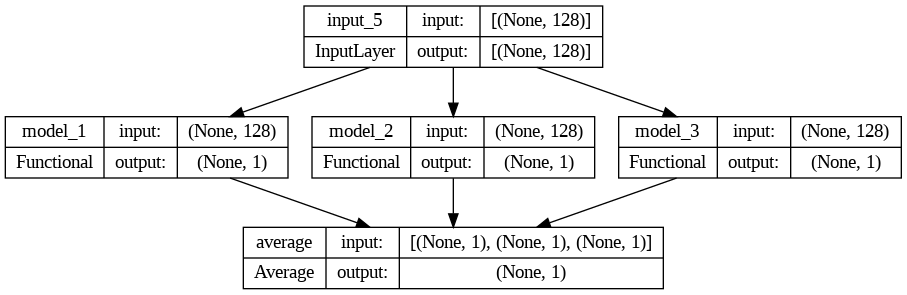

In [9]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

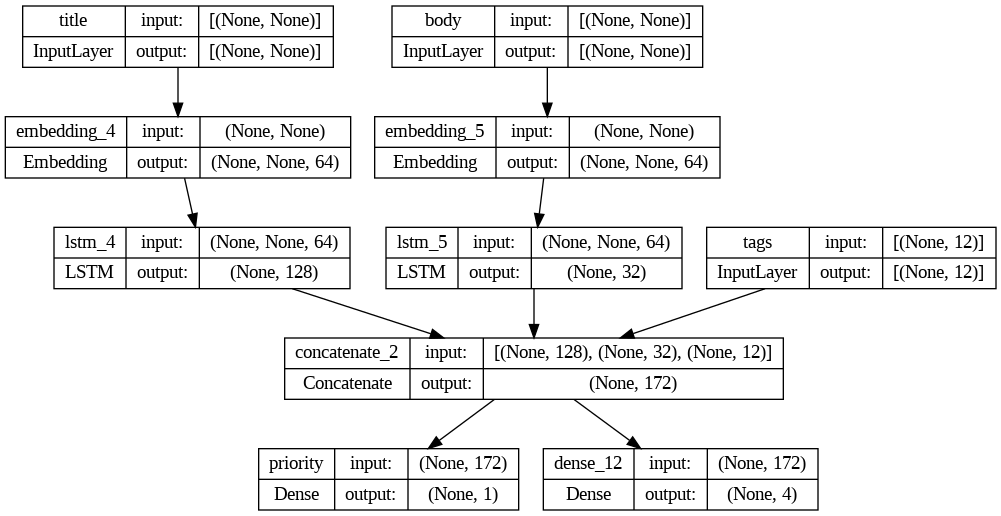

In [13]:
# MODELO QUE CLASIFICA LOS TICKETS DE LOS CLIENTES POR PRIORIDAD Y LOS CANALIZA
# AL DEPARTAMENTO CORRECTO CON TRES ENTRADAS Y DOS SALIDAS

num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None,), name='title')
body_input = keras.Input(shape=(None,), name='body')
tags_input = keras.Input(shape=(num_tags,), name='tags')

title_features = layers.Embedding(num_words,64)(title_input)
body_features = layers.Embedding(num_words,64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x=layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, activation='sigmoid', name= 'priority')(x)
department_pred = layers. Dense(num_departments,
                                activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

keras.utils.plot_model(model, show_shapes=True)


In [15]:
# Obtener la red VGG16 con la API de Keras

from keras.applications import VGG16

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            